# ML Practices

### Import packages

In [ ]:
# Import python packages
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

### Metadata


This dataset is about past loans. The **Loan_train.csv** data set includes details of 346 customers whose loan are already paid off or defaulted. It includes following fields:

| Field          | Description                                                                           |
| -------------- | ------------------------------------------------------------------------------------- |
| Loan_status    | Whether a loan is paid off or in collection                                           |
| Principal      | Basic principal loan amount at the                                                    |
| Terms          | Origination terms which can be weekly (7 days), biweekly, and monthly payoff schedule |
| Effective_date | When the loan got originated and took effects                                         |
| Due_date       | Since it’s one-time payoff schedule, each loan has one single due date                |
| Age            | Age of applicant                                                                      |
| Education      | Education of applicant                                                                |
| Gender         | The gender of applicant                                                               |


In [ ]:
# download data file
!wget -O loan_train.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/FinalModule_Coursera/data/loan_train.csv

--2022-06-14 23:00:47--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/FinalModule_Coursera/data/loan_train.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23101 (23K) [text/csv]
Saving to: ‘loan_train.csv’

loan_train.csv      100%[===================>]  22.56K  --.-KB/s    in 0.001s  

2022-06-14 23:00:47 (19.0 MB/s) - ‘loan_train.csv’ saved [23101/23101]



### Load Data From CSV File


In [ ]:
df = pd.read_csv('loan_train.csv')
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,9/8/2016,10/7/2016,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,9/8/2016,10/7/2016,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,9/8/2016,9/22/2016,27,college,male
3,4,4,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,female
4,6,6,PAIDOFF,1000,30,9/9/2016,10/8/2016,29,college,male


In [ ]:
df.shape

(346, 10)

### Convert to date time object


In [ ]:
df['effective_date'] = pd.to_datetime(df['effective_date'])
df['due_date'] = pd.to_datetime(df['due_date'])
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male


# Data visualization and pre-processing


Let’s see how many of each class is in our data set


In [ ]:
df['loan_status'].value_counts()

PAIDOFF       260
COLLECTION     86
Name: loan_status, dtype: int64

260 people have paid off the loan on time while 86 have gone into collection


Let's plot some columns to underestand data better:


In [ ]:
# notice: installing seaborn might takes a few minutes
#!conda install -c anaconda seaborn -y

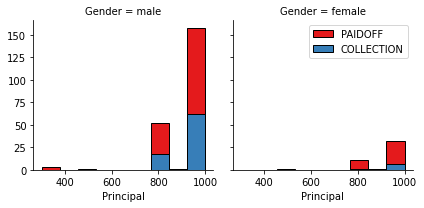

In [ ]:
import seaborn as sns

# return 10 evenly spaced samples
bins = np.linspace(df.Principal.min(), df.Principal.max(), 10)
# create a facetgrid for each gender, color with loan types
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
# plot histogram
g.map(plt.hist, 'Principal', bins=bins, ec="k")

g.axes[1].legend() # set legend
plt.show()

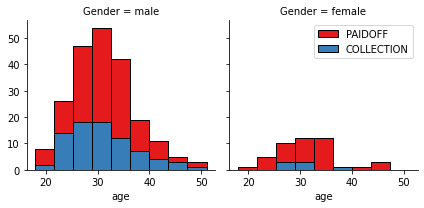

In [ ]:
bins = np.linspace(df.age.min(), df.age.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'age', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

# Pre-processing:  Feature selection/extraction


### Let's look at the day of the week people get the loan


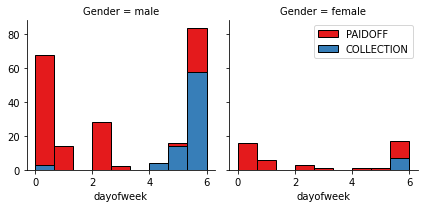

In [ ]:
df['dayofweek'] = df['effective_date'].dt.dayofweek
bins = np.linspace(df.dayofweek.min(), df.dayofweek.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'dayofweek', bins=bins, ec="k")
g.axes[-1].legend()
plt.show()

We see that people who get the loan at the end of the week don't pay it off, so let's use Feature binarization to set a threshold value less than day 4


In [ ]:
df['weekend'] = df['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male,3,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female,3,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male,3,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female,4,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male,4,1


## Convert Categorical features to numerical values


Let's look at gender:


In [ ]:
df.groupby(['Gender'])['loan_status'].value_counts(normalize=True)

Gender  loan_status
female  PAIDOFF        0.865385
        COLLECTION     0.134615
male    PAIDOFF        0.731293
        COLLECTION     0.268707
Name: loan_status, dtype: float64

86 % of female pay their loans while only 73 % of males pay their loans


Let's convert male to 0 and female to 1:


In [ ]:
df['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,0,3,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,1,3,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,0,3,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,1,4,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,0,4,1


## One Hot Encoding

#### How about education?


In [ ]:
df.groupby(['education'])['loan_status'].value_counts(normalize=True) # return relative frequency

education             loan_status
Bechalor              PAIDOFF        0.750000
                      COLLECTION     0.250000
High School or Below  PAIDOFF        0.741722
                      COLLECTION     0.258278
Master or Above       COLLECTION     0.500000
                      PAIDOFF        0.500000
college               PAIDOFF        0.765101
                      COLLECTION     0.234899
Name: loan_status, dtype: float64

#### Features before One Hot Encoding


In [ ]:
df[['Principal','terms','age','Gender','education']].head()

,Principal,terms,age,Gender,education
0,1000,30,45,0,High School or Below
1,1000,30,33,1,Bechalor
2,1000,15,27,0,college
3,1000,30,28,1,college
4,1000,30,29,0,college


#### Use one hot encoding technique to conver categorical varables to binary variables and append them to the feature Data Frame


In [ ]:
Feature = df[['Principal','terms','age','Gender','weekend']]
Feature = pd.concat([Feature,pd.get_dummies(df['education'])], axis=1)
#Feature['Master or Above'].value_counts() 
Feature.drop(['Master or Above'], axis = 1,inplace=True) # since this column has almost only 0
Feature.head()

,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,45,0,0,0,1,0
1,1000,30,33,1,0,1,0,0
2,1000,15,27,0,0,0,0,1
3,1000,30,28,1,1,0,0,1
4,1000,30,29,0,1,0,0,1


In [ ]:
Feature.isna().sum()

Principal               0
terms                   0
age                     0
Gender                  0
weekend                 0
Bechalor                0
High School or Below    0
college                 0
dtype: int64

### Feature Selection


Let's define feature sets, X:


In [ ]:
X = Feature # normalization process will remove header
X[0:5]

,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,45,0,0,0,1,0
1,1000,30,33,1,0,1,0,0
2,1000,15,27,0,0,0,0,1
3,1000,30,28,1,1,0,0,1
4,1000,30,29,0,1,0,0,1


What are our lables?


In [ ]:
y = df['loan_status'].values
y[0:5]

array(['PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF'],
      dtype=object)

## Normalize Data


Data Standardization give data zero mean and unit variance (technically should be done after train test split)


In [ ]:
X= preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[ 0.51578458,  0.92071769,  2.33152555, -0.42056004, -1.20577805,
        -0.38170062,  1.13639374, -0.86968108],
       [ 0.51578458,  0.92071769,  0.34170148,  2.37778177, -1.20577805,
         2.61985426, -0.87997669, -0.86968108],
       [ 0.51578458, -0.95911111, -0.65321055, -0.42056004, -1.20577805,
        -0.38170062, -0.87997669,  1.14984679],
       [ 0.51578458,  0.92071769, -0.48739188,  2.37778177,  0.82934003,
        -0.38170062, -0.87997669,  1.14984679],
       [ 0.51578458,  0.92071769, -0.3215732 , -0.42056004,  0.82934003,
        -0.38170062, -0.87997669,  1.14984679]])

# Classification


Now, it is your turn, use the training set to build an accurate model. Then use the test set to report the accuracy of the model
You should use the following algorithm:

*   K Nearest Neighbor(KNN)
*   Decision Tree
*   Support Vector Machine
*   Logistic Regression

\__ Notice:\__

*   You can go above and change the pre-processing, feature selection, feature-extraction, and so on, to make a better model.
*   You should use either scikit-learn, Scipy or Numpy libraries for developing the classification algorithms.
*   You should include the code of the algorithm in the following cells.


# K Nearest Neighbor(KNN)

Notice: You should find the best k to build the model with the best accuracy.\
**warning:** You should not use the **loan_test.csv** for finding the best k, however, you can split your train_loan.csv into train and test to find the best **k**.


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import jaccard_score

In [ ]:
# create train and test data sets
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=9)
print("Train sample size:", x_train.shape, y_train.shape)
print("Test sample size:", x_test.shape, y_test.shape)

Train sample size: (276, 8) (276,)
Test sample size: (70, 8) (70,)


### Explore model accuracy with different k values

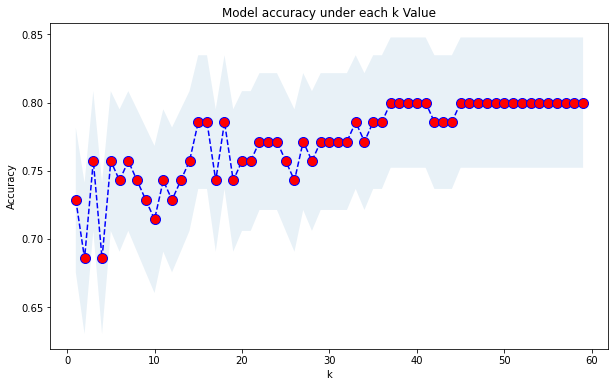

The maximum accuracy is 0.8 , achieved when k= 37


In [ ]:
# select k based on accuracy rate
ks = 60
acc = np.zeros((ks-1))
std = np.zeros((ks-1))

for k in range(1,ks):
    neigh = KNeighborsClassifier(n_neighbors=k).fit(x_train, y_train)
    pred_y = neigh.predict(x_test)
    accuracy_score = metrics.accuracy_score(y_test, pred_y)
    acc[k-1] = accuracy_score # add accuracy rate
    standard_deviation = np.std(pred_y==y_test)/np.sqrt(pred_y.shape[0])
    std[k-1] = standard_deviation # add standard_deviation

# plot model accuarcy with different k selection
plt.figure(figsize=(10,6))
plt.plot(range(1,ks),acc,color = 'blue',linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.fill_between(range(1,ks), acc - 1 * std, acc + 1 * std, alpha=0.10)
plt.title('Model accuracy under each k Value')
plt.xlabel('k')
plt.ylabel('Accuracy')

plt.show()
print( "The maximum accuracy is", acc.max(), ", achieved when k=", acc.argmax()+1) 

As we can see, model accuracy does not go up obviously after point k=36. <br>
Therefore, we will select k as 36 and expect near 80% model accuracy.

In [ ]:
neigh = KNeighborsClassifier(n_neighbors=37).fit(x_train, y_train)
pred_y = neigh.predict(x_test)

In [ ]:
print(metrics.classification_report(y_test, pred_y))

              precision    recall  f1-score   support

  COLLECTION       0.50      0.07      0.12        14
     PAIDOFF       0.81      0.98      0.89        56

    accuracy                           0.80        70
   macro avg       0.65      0.53      0.51        70
weighted avg       0.75      0.80      0.73        70



In [ ]:
round(jaccard_score(y_test, pred_y, average='weighted'), 2)

0.65

# Decision Tree


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

### This time let's not use normalized data

In [ ]:
# create train and test data sets
x_train1, x_test1, y_train1, y_test1 = train_test_split(Feature,y, test_size=0.2, random_state=9)
print("Train sample size:", x_train1.shape, y_train1.shape)
print("Test sample size:", x_test1.shape, y_test1.shape)

Train sample size: (276, 8) (276,)
Test sample size: (70, 8) (70,)


In [ ]:
# build decition tree model
dtc = DecisionTreeClassifier(max_depth=5, random_state=9) # set max depth 4
dtc.fit(x_train1, y_train1)

DecisionTreeClassifier(max_depth=5, random_state=9)

### Let's Vasualize the decition tree

In [ ]:
feature_names = list(Feature.columns)
labels = ['COLLECTION', 'PAIDOFF']

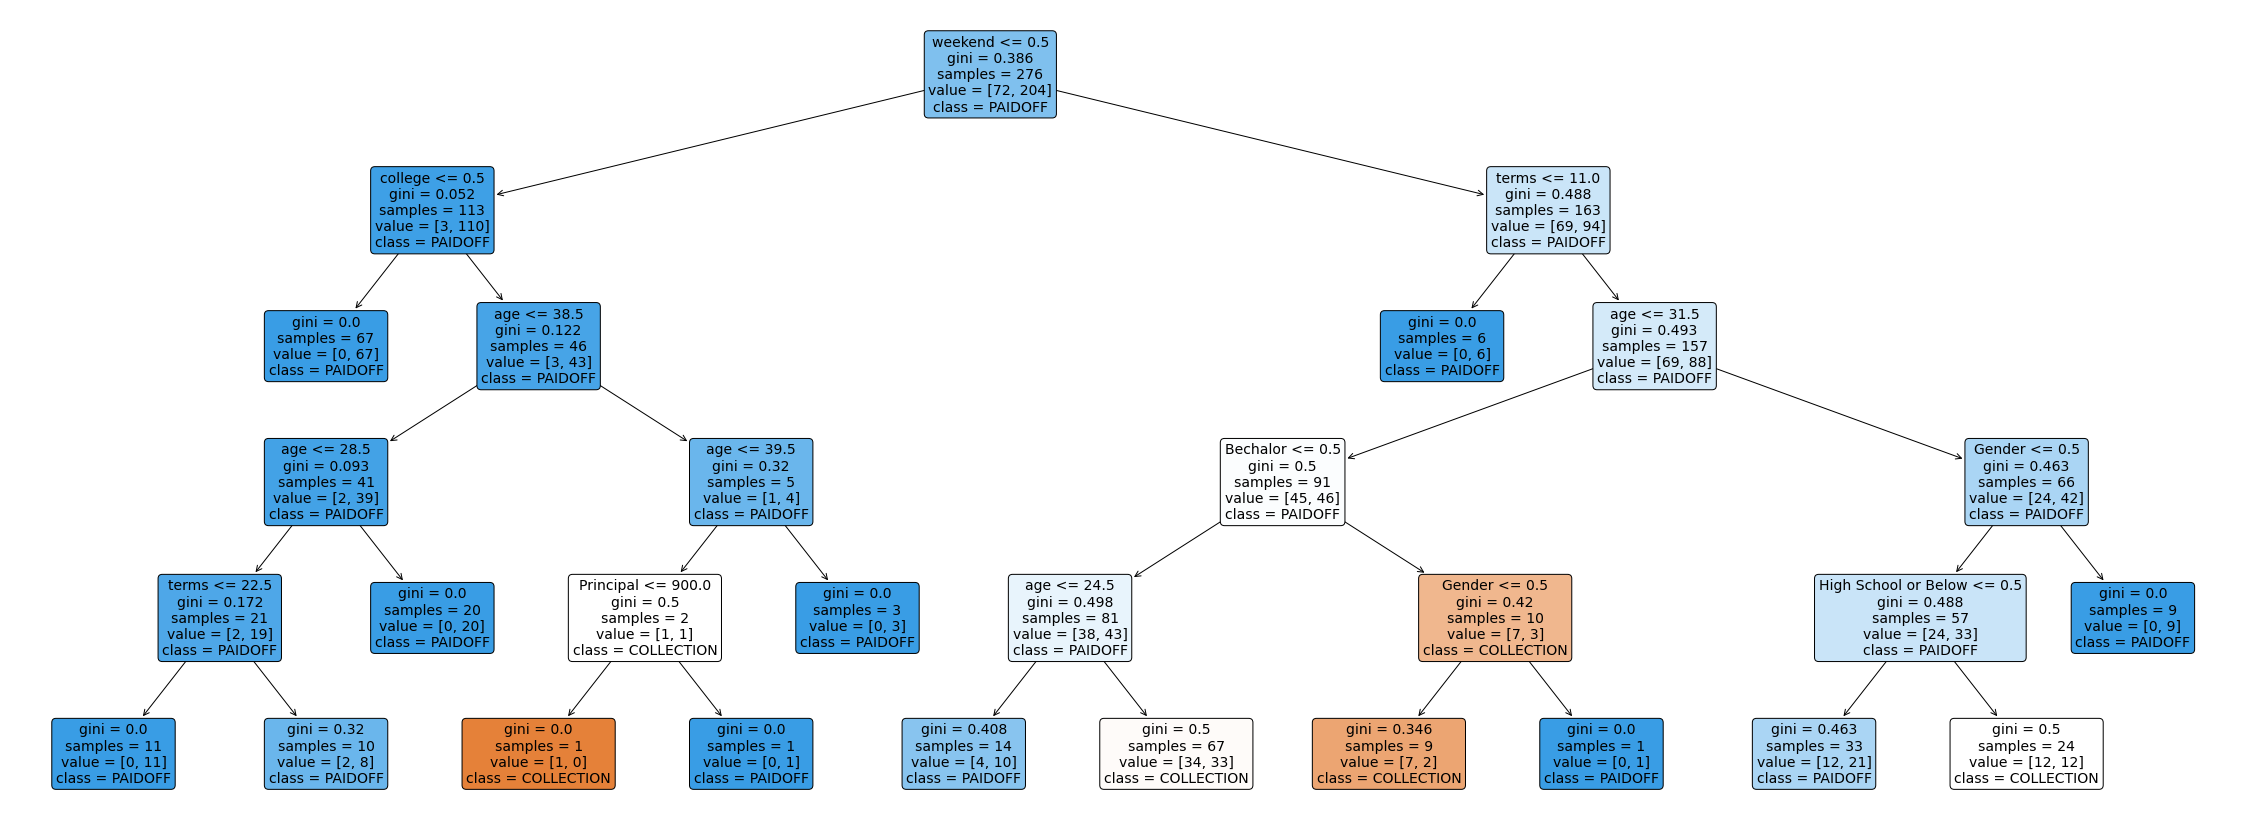

In [ ]:
fig = plt.figure(figsize=(40,15))
a = tree.plot_tree(dtc, 
                   feature_names = feature_names,
                   class_names = labels,
                   rounded = True, filled = True, fontsize=14)
#show the plot
plt.show()

### Evaluate prediction

In [ ]:
dtc.fit(x_train, y_train)
predict = dtc.predict(x_test)

In [ ]:
# create confusion matrix
confusion_matrix = metrics.confusion_matrix(y_test, predict)
matrix_df = pd.DataFrame(confusion_matrix)

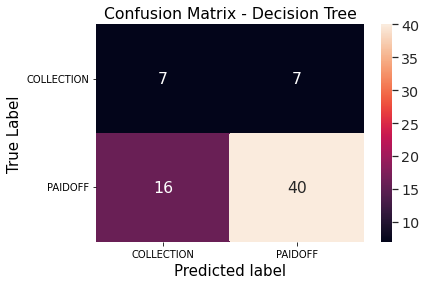

<Figure size 720x504 with 0 Axes>

In [ ]:
ax = plt.axes()
sns.set(font_scale=1.3)
plt.figure(figsize=(10,7))
sns.heatmap(matrix_df, annot=True, fmt="g", ax=ax)
ax.set_title('Confusion Matrix - Decision Tree')
ax.set_xlabel("Predicted label", fontsize =15)
ax.set_xticklabels(labels)
ax.set_ylabel("True Label", fontsize=15)
ax.set_yticklabels(list(labels), rotation = 0)
plt.show()

In [ ]:
print(metrics.classification_report(y_test1, predict))

              precision    recall  f1-score   support

  COLLECTION       0.30      0.50      0.38        14
     PAIDOFF       0.85      0.71      0.78        56

    accuracy                           0.67        70
   macro avg       0.58      0.61      0.58        70
weighted avg       0.74      0.67      0.70        70



In [ ]:
round(jaccard_score(y_test, pred_y, average="weighted"), 2) # we use micro

0.65

# Support Vector Machine


In [ ]:
from sklearn import svm

In [ ]:
kernal = ['linear', 'sigmoid', 'rbf', 'poly']

In [ ]:
# select best kernal for this case
for i in kernal:
  svM = svm.SVC(kernel=i)
  svM.fit(x_train, y_train)
  y_pred = svM.predict(x_test)
  # add accuracy score
  accuracy_score = metrics.accuracy_score(y_test, pred_y)
  print('Kernal:', i+', accuracy:', accuracy_score)

Kernal: linear, accuracy: 0.8
Kernal: sigmoid, accuracy: 0.8
Kernal: rbf, accuracy: 0.8
Kernal: poly, accuracy: 0.8


As we see, different kenrals result in same accuracy, so we just use linear

In [ ]:
svM = svm.SVC(kernel='poly')
svM.fit(x_train, y_train)
y_pred = svM.predict(x_test)

In [ ]:
print(metrics.classification_report(y_test, predict))

              precision    recall  f1-score   support

  COLLECTION       0.30      0.50      0.38        14
     PAIDOFF       0.85      0.71      0.78        56

    accuracy                           0.67        70
   macro avg       0.58      0.61      0.58        70
weighted avg       0.74      0.67      0.70        70



In [ ]:
round(jaccard_score(y_test, y_pred, average='weighted'), 2)

0.63

# Logistic Regression


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss

In [ ]:
clf = LogisticRegression(random_state=9, solver='liblinear').fit(x_train, y_train)
Y_pred = clf.predict(x_test)

In [ ]:
print(metrics.classification_report(y_test, Y_pred))

              precision    recall  f1-score   support

  COLLECTION       0.50      0.21      0.30        14
     PAIDOFF       0.83      0.95      0.88        56

    accuracy                           0.80        70
   macro avg       0.66      0.58      0.59        70
weighted avg       0.76      0.80      0.77        70



In [ ]:
round(jaccard_score(y_test, Y_pred, average='weighted'), 2)

0.67

# Model Evaluation using Test set


Download and load the test set:


In [ ]:
!wget -O loan_test.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_test.csv

--2022-06-14 23:00:55--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_test.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3642 (3.6K) [text/csv]
Saving to: ‘loan_test.csv’

loan_test.csv       100%[===================>]   3.56K  --.-KB/s    in 0s      

2022-06-14 23:00:56 (528 MB/s) - ‘loan_test.csv’ saved [3642/3642]



### Transform test data


In [ ]:
test_df = pd.read_csv('loan_test.csv')
test_df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,1,1,PAIDOFF,1000,30,9/8/2016,10/7/2016,50,Bechalor,female
1,5,5,PAIDOFF,300,7,9/9/2016,9/15/2016,35,Master or Above,male
2,21,21,PAIDOFF,1000,30,9/10/2016,10/9/2016,43,High School or Below,female
3,24,24,PAIDOFF,1000,30,9/10/2016,10/9/2016,26,college,male
4,35,35,PAIDOFF,800,15,9/11/2016,9/25/2016,29,Bechalor,male


In [ ]:
test_df.isna().sum()

Unnamed: 0        0
Unnamed: 0.1      0
loan_status       0
Principal         0
terms             0
effective_date    0
due_date          0
age               0
education         0
Gender            0
dtype: int64

In [ ]:
test_df['effective_date'] = pd.to_datetime(test_df['effective_date'])
test_df['due_date'] = pd.to_datetime(test_df['due_date'])
test_df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,1,1,PAIDOFF,1000,30,2016-09-08,2016-10-07,50,Bechalor,female
1,5,5,PAIDOFF,300,7,2016-09-09,2016-09-15,35,Master or Above,male
2,21,21,PAIDOFF,1000,30,2016-09-10,2016-10-09,43,High School or Below,female
3,24,24,PAIDOFF,1000,30,2016-09-10,2016-10-09,26,college,male
4,35,35,PAIDOFF,800,15,2016-09-11,2016-09-25,29,Bechalor,male


In [ ]:
test_df['dayofweek'] = test_df['effective_date'].dt.dayofweek
test_df['weekend'] = test_df['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)
test_df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,1,1,PAIDOFF,1000,30,2016-09-08,2016-10-07,50,Bechalor,female,3,0
1,5,5,PAIDOFF,300,7,2016-09-09,2016-09-15,35,Master or Above,male,4,1
2,21,21,PAIDOFF,1000,30,2016-09-10,2016-10-09,43,High School or Below,female,5,1
3,24,24,PAIDOFF,1000,30,2016-09-10,2016-10-09,26,college,male,5,1
4,35,35,PAIDOFF,800,15,2016-09-11,2016-09-25,29,Bechalor,male,6,1


In [ ]:
test_df['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)
test_df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,1,1,PAIDOFF,1000,30,2016-09-08,2016-10-07,50,Bechalor,1,3,0
1,5,5,PAIDOFF,300,7,2016-09-09,2016-09-15,35,Master or Above,0,4,1
2,21,21,PAIDOFF,1000,30,2016-09-10,2016-10-09,43,High School or Below,1,5,1
3,24,24,PAIDOFF,1000,30,2016-09-10,2016-10-09,26,college,0,5,1
4,35,35,PAIDOFF,800,15,2016-09-11,2016-09-25,29,Bechalor,0,6,1


In [ ]:
Feature = test_df[['Principal','terms','age','Gender','weekend']]

In [ ]:
Feature.isna().sum()

Principal    0
terms        0
age          0
Gender       0
weekend      0
dtype: int64

In [ ]:
Feature = pd.concat([Feature,pd.get_dummies(test_df['education'])], axis=1)
#Feature['Master or Above'].value_counts() 
Feature.drop(['Master or Above'], axis = 1,inplace=True) # since this column has almost only 0
Feature.head()

,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,50,1,0,1,0,0
1,300,7,35,0,1,0,0,0
2,1000,30,43,1,1,0,1,0
3,1000,30,26,0,1,0,0,1
4,800,15,29,0,1,1,0,0


In [ ]:
Feature.isna().sum()

Principal               0
terms                   0
age                     0
Gender                  0
weekend                 0
Bechalor                0
High School or Below    0
college                 0
dtype: int64

In [ ]:
X = Feature # normalization process will remove header
X[0:5]

,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,50,1,0,1,0,0
1,300,7,35,0,1,0,0,0
2,1000,30,43,1,1,0,1,0
3,1000,30,26,0,1,0,0,1
4,800,15,29,0,1,1,0,0


In [ ]:
y_t = test_df['loan_status'].values
y[0:5]

array(['PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF'],
      dtype=object)

In [ ]:
X= preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[ 0.49362588,  0.92844966,  3.05981865,  1.97714211, -1.30384048,
         2.39791576, -0.79772404, -0.86135677],
       [-3.56269116, -1.70427745,  0.53336288, -0.50578054,  0.76696499,
        -0.41702883, -0.79772404, -0.86135677],
       [ 0.49362588,  0.92844966,  1.88080596,  1.97714211,  0.76696499,
        -0.41702883,  1.25356634, -0.86135677],
       [ 0.49362588,  0.92844966, -0.98251057, -0.50578054,  0.76696499,
        -0.41702883, -0.79772404,  1.16095912],
       [-0.66532184, -0.78854628, -0.47721942, -0.50578054,  0.76696499,
         2.39791576, -0.79772404, -0.86135677]])

## Models

In [ ]:
## KNN
pred_y_KNN = neigh.predict(X)
j = round(jaccard_score(y_t, pred_y_KNN, average='weighted'), 2)
print(metrics.classification_report(y_t, pred_y_KNN))
print('')
print('Jaccard score is:',j)

              precision    recall  f1-score   support

  COLLECTION       1.00      0.21      0.35        14
     PAIDOFF       0.78      1.00      0.88        40

    accuracy                           0.80        54
   macro avg       0.89      0.61      0.62        54
weighted avg       0.84      0.80      0.74        54


Jaccard score is: 0.64


In [ ]:
## Decision Tree
pred_y_tree = dtc.predict(X)
j = round(jaccard_score(y_t, pred_y_tree, average='weighted'), 2)
print(metrics.classification_report(y_t, pred_y_tree))
print('')
print('Jaccard score is:',j)

              precision    recall  f1-score   support

  COLLECTION       0.56      0.71      0.63        14
     PAIDOFF       0.89      0.80      0.84        40

    accuracy                           0.78        54
   macro avg       0.72      0.76      0.73        54
weighted avg       0.80      0.78      0.79        54


Jaccard score is: 0.66


In [ ]:
## SVM
pred_y_svm = svM.predict(X)
j = round(jaccard_score(y_t, pred_y_svm, average='weighted'), 2)
print(metrics.classification_report(y_t, pred_y_svm))
print('')
print('Jaccard score is:',j)

              precision    recall  f1-score   support

  COLLECTION       0.50      0.14      0.22        14
     PAIDOFF       0.76      0.95      0.84        40

    accuracy                           0.74        54
   macro avg       0.63      0.55      0.53        54
weighted avg       0.69      0.74      0.68        54


Jaccard score is: 0.57


In [ ]:
## Logistic Regression
pred_y_lgm = clf.predict(X)
j = round(jaccard_score(y_t, pred_y_lgm, average='weighted'), 2)

from sklearn.metrics import log_loss
yhat_prob = clf.predict_proba(X)
log_loss = round(log_loss(y_t, yhat_prob),2)

print(metrics.classification_report(y_t, pred_y_lgm))
print('')
print('Jaccard score is:',j)
print('Log loss is:', log_loss)

              precision    recall  f1-score   support

  COLLECTION       1.00      0.07      0.13        14
     PAIDOFF       0.75      1.00      0.86        40

    accuracy                           0.76        54
   macro avg       0.88      0.54      0.50        54
weighted avg       0.82      0.76      0.67        54


Jaccard score is: 0.58
Log loss is: 0.48


# Report

You should be able to report the accuracy of the built model using different evaluation metrics:


In [ ]:
evaluation = {
    'Classification Model': ['KNN', 'Decision Tree', 'SVM', 'Logistic Regression'],
    'Jaccard_score': [0.64, 0.66, 0.57, 0.58],
    'F-1 score': [0.74, 0.79, 0.68, 0.67],
    'Log loss': ['nan', 'nan', 'nan', 0.48]
}

evaluation = pd.DataFrame(evaluation)

In [ ]:
evaluation

,Classification Model,Jaccard_score,F-1 score,Log loss
0,KNN,0.64,0.74,nan
1,Decision Tree,0.66,0.79,nan
2,SVM,0.57,0.68,nan
3,Logistic Regression,0.58,0.67,0.48


Based on table above, **Decision Tree** is the best model